In [2]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [5]:
def load_extracted_features(dataset_folder):
    folders = sorted(glob.glob("{}/processed/*".format(dataset_folder)))
    classes_no = []
    features = None

    for folder in folders:
        new_class_features = None
        files = sorted(glob.glob("{}/*.features".format(folder)))  # .features add a sorted for equvalance purposes
        for f in files:
            with open(f, 'rb') as in_file:
                new_features = pickle.load(in_file)

            if new_class_features is None:
                new_class_features = new_features
            else:
                new_class_features = np.append(new_class_features, new_features, axis=0)

        classes_no.append(len(new_class_features))
        if features is None:
            features = new_class_features
        else:
            features = np.append(features, new_class_features, axis=0)
            
        labels = []

        for (i, no) in enumerate(classes_no):
            new_labels = [i] * no
            labels += new_labels

    features = np.asarray(features)
    features = np.squeeze(features, axis=1)
    labels = np.asarray(labels)

    return features, labels


In [14]:
DATA_LOCATION = 'C:\\Users\\ivasc\\Documents\\disertatie\\datasets\\caltech256\\vgg' # vgg
DATA_LOCATION_RESNET = 'C:\\Users\\ivasc\\Documents\\disertatie\\datasets\\caltech256\\resnet'
DATA_LOCATION_REVNET = 'C:\\Users\\ivasc\\Documents\\disertatie\\datasets\\caltech256\\revnet'

In [11]:
features, labels = load_extracted_features(DATA_LOCATION)

In [7]:
kmeans = KMeans(n_clusters=256, random_state=0).fit(features)

C:\Users\ivasc\Anaconda3\envs\tf_home\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [40]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [12]:
klabels = kmeans.labels_
klabels = np.array(klabels)
print(np.unique(klabels))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [39]:
vgg=adjusted_rand_score(labels, klabels)  
vgg

0.21024049097130007

In [41]:
s_vgg = silhouette_score(features, klabels, metric='euclidean')
s_vgg

-0.03219283

In [19]:
rsfeatures, rslabels = load_extracted_features(DATA_LOCATION_RESNET)

In [20]:
kmeans_resnet = KMeans(n_clusters=256, random_state=0).fit(rsfeatures)

C:\Users\ivasc\Anaconda3\envs\tf_home\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [21]:
resnet=adjusted_rand_score(rslabels, kmeans_resnet.labels_) 
resnet

0.4467575031012859

In [42]:
s_resnet = silhouette_score(rsfeatures, kmeans_resnet.labels_, metric='euclidean')
s_resnet

0.09377937

In [22]:
rvfeatures, rvlabels = load_extracted_features(DATA_LOCATION_REVNET)

In [23]:
kmeans_revnet = KMeans(n_clusters=256, random_state=0).fit(rvfeatures)

C:\Users\ivasc\Anaconda3\envs\tf_home\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [24]:
revnet=adjusted_rand_score(rvlabels, kmeans_revnet.labels_) 
revnet

0.07076308143274515

In [43]:
s_revnet = silhouette_score(rvfeatures, kmeans_revnet.labels_, metric='euclidean')
s_revnet

0.026611447

# Plot scores - adjusted_rand_score

In [45]:
# pretty bar chart settings
# change font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
# change style axis
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'


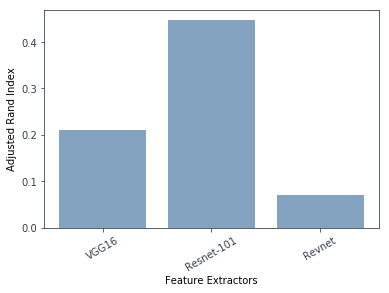

In [60]:
label = ['VGG16', 'Resnet-101', 'Revnet']
scores = [vgg, resnet, revnet]

index = np.arange(len(label))
plt.bar(index, scores, color=(0.2, 0.4, 0.6, 0.6))

plt.xlabel('Feature Extractors', fontsize=10)
plt.ylabel('Adjusted Rand Index', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
#plt.title('TBA', fontsize=18)
plt.savefig('./Adjusted_Rand_Indx_vgg_resnet_revnet_ugly.PNG') # Adjusted Rand Score in External Cluster Validation
plt.show()

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

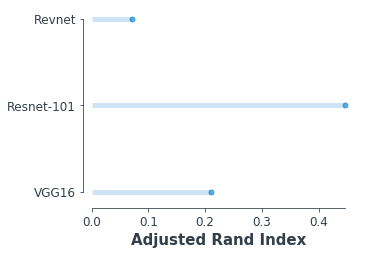

In [61]:
fig, ax = plt.subplots(figsize=(5,3.5))
plt.hlines(y=np.arange(len(label)), xmin=0, xmax=scores, color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(scores, np.arange(len(label)), "o", markersize=5, color='#007ACC', alpha=0.6)
ax.set_xlabel('Adjusted Rand Index', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(np.arange(len(label)), label)

#fig.text(-0.23, 0.96, 'TBA', fontsize=15, fontweight='black', color = '#333F4B')

#change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

#set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('./Adjusted_Rand_Indx_vgg_resnet_revnet.PNG', dpi=300, bbox_inches='tight')